In [1]:
pip install scikit-learn

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached numpy-2.3.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -------------- ------------------------- 3.1/8.7 MB 16.9 MB/s eta 0:00:01
   -------------------------------- ------- 7.1/8.7 MB 17.5 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 16.4 MB/s  0:00:00
Using cached numpy-2.3.4-cp312-cp312-win_amd64.whl (12.8 MB)
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   --- ------------------------------------ 3.7/38.6 MB 19.8 MB/s eta 0:00:02
   -------- ------------------------------- 8.1/38.6 MB 20.2 MB/s eta 0:00:02
   ------------ --------------------------- 12.1/38.6 MB 19.9 MB/s eta 0:00:02
   ---------------- ----------------------- 16.3/38.6 MB 20.1 MB/s eta 0:00:02
   --------------------- ------------------ 20.4/38.6 MB 19.9 MB/s eta 0:00:01
   ------------------------- -----------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # For scaling the data

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# See the first 5 rows
print("--- First 5 Rows ---")
print(df.head())

# Get info on columns and missing values
print("\n--- Data Info ---")
df.info()


--- First 5 Rows ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# We are selecting 'Annual Income (k$)' and 'Spending Score (1-100)'
# We use .values to get a NumPy array, which is what scikit-learn needs
X = df.iloc[:, [3, 4]].values

print("--- First 5 data points for clustering ---")
print(X[:5])


--- First 5 data points for clustering ---
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


In [5]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

print("Data scaled successfully.")
print(X_scaled[:5])

Data scaled successfully.
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


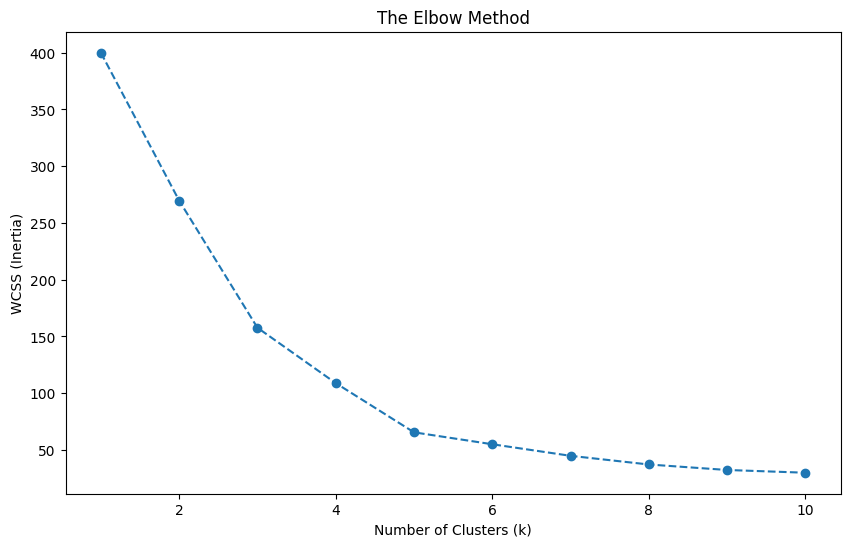

In [6]:
# WCSS = Within-Cluster Sum of Squares
wcss = []

# We'll test k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

In [7]:
# Apply K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)

# Fit the model and predict the cluster for each data point
y_kmeans = kmeans.fit_predict(X_scaled)

print("K-Means applied successfully. Cluster labels:")
print(y_kmeans)

K-Means applied successfully. Cluster labels:
[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


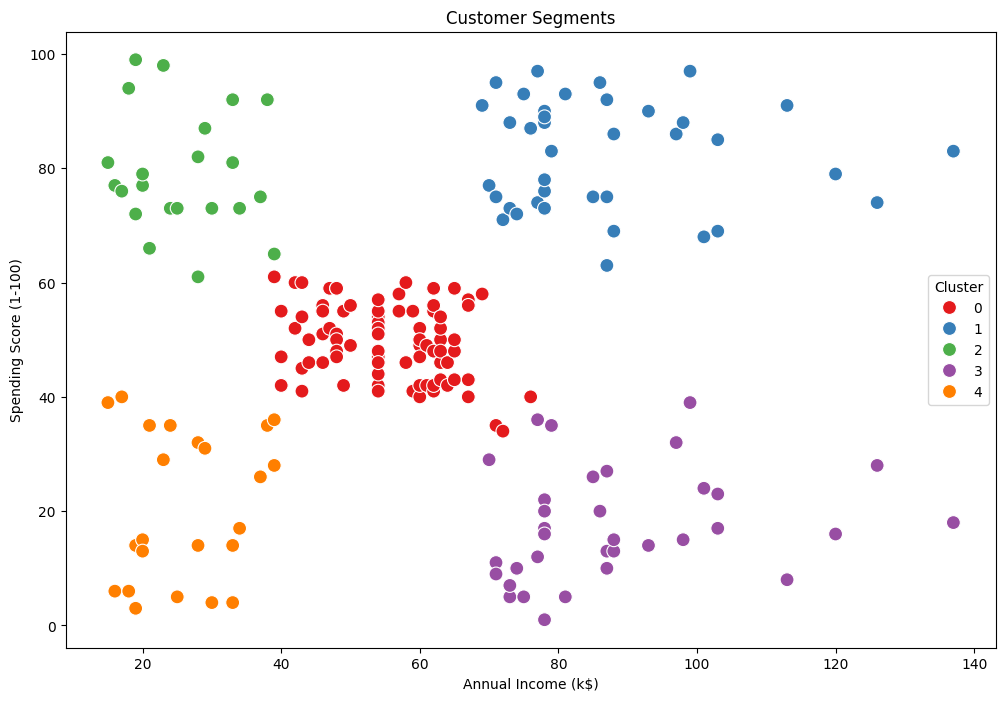

In [8]:
# Add the cluster labels back to our original DataFrame
df['Cluster'] = y_kmeans

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()